full bathroom - toilet, sink, bathtub/shower (4 plumming fixtures)
half bathroom - toilet, and sink
3/4 bath - toilet, sink, and shower

question: 

audience - non technical stakeholder

* "how did you pick the question(s) that you did?"

* "why are these questions important from a business perspective?"
* "how did you decide on the data cleaning options you performed?"
* "why did you choose a given method or library?"
* "why did you select those visualizations and what did you learn from each of them?"
* "why did you pick those features as predictors?"
* "how would you interpret the results?"
* "how confident are you in the predictive quality of the results?"
* "what are some of the things that could cause the results to be wrong?"


1. (maybe) sqft_living15 (compare with sqft lot15) link to pop density (keep the anomolies incase people tend to live on bigger land)<br> what other variables can we link to population

1. (maybe) create a zip code average price to determine how nice a neightbourhood is then relate that to size <br>
>*zip_code + avg grade to determine a nice area. <br>

2. How much value do the combination of bathrooms and rooms bring to the value of the property? (are the number of bedrooms and bathrooms equal if so does an additional bathroom add value?)

3. **3842 entries of yr renovated with NaN values** drop them (maybe) - __3rd question. to see best year for renovation in correlation to price__ <br>

>* ~~How much does the land itself cost (without the additional building)~~
>>* would these renovations be more valuable in the more dense parts of the city?
>*~~compare new renovations with year built and price? this may show us how valuable ~~
>*see how fast renovations get sold vs non reno's (people may be over renovating) (how valuable are renovations?)<br>

4. Based off our provided variables can we create mathematical model that will predict the price of properties within Kings County, Washington?





~~segregate houses into price brackets (income might effect if a person cares about waterfront view or not)~~<br>
~~make a graph with anything .5 or above correlating to price.~~<br>
~~sqft_lot15 to see what prices come up to predict if expensive house is related to non agricultural or not.~~<br>



~~Compare views with price to see if we can predict purchasing power - people tend to view whats in their budget and are disuaded by high price.~~ 


We are two data scientists from London with the task of predicting house prices in the city of Seattle in the state of Washington. We will use a simple linear regression model and compare multiple variables to be able to achieve this.

In [3]:
len(ds.zipcode.unique())

NameError: name 'ds' is not defined

## Import libraries:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.__version__
import statistics as stat


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [93]:
ds = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/london-ds-010620/master/mod_1/project/kc_house_data.csv')

## Dealing with potential duplicate data:

DataFrame.duplicated(subset=None, keep='first') <br>
ds = ds.sort_values('date').drop_duplicates('id', keep='first') ds.sort_values('id', ascending = True, inplace = True) df_test.head()

In [94]:
ds_test_set = ds

In [95]:
ds_test_set.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [96]:
ds_test_set = ds_test_set.sort_values('date').drop_duplicates('id', keep='first') 
ds_test_set.sort_values('id', ascending = True, inplace = True) 

print("Original number of entries:", len(ds))
print("Number of duplicated entries dropped:", len(ds)-len(ds_test_set))
print("Number of unique entries:", len(ds_test_set))









Original number of entries: 21597
Number of duplicated entries dropped: 177
Number of unique entries: 21420


## Drop NaN's (or fill them with a something)

* ds.dropna(inplace=True)
or
* ds.fillna()

In [97]:
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [98]:
print("indexes with null values:", " \n" , ds.isnull().sum())

print("total number of nulls:", ds.isnull().sum().sum())

indexes with null values:  
 id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
total number of nulls: 6281


* We chose to zero out waterfront as not a large amount of properties in the data set have been missrepresented and the remaining data for those fields seem ok to work with. (This problem could have occured due to lazy data entry)
* 3842 null values are represented in the yr renovated column. Instead of removing those entries, we thought it may be best to just zero them out and make note when dealing with the yr renovated index that we did that (or completely remove those entries when working with that column)

* Its best to zero out the view column as it does not provide too much hinderance to our data set doing so as there are only 63 null entries. If we decide to work with this index we will remove the entries since we don't want their binary value to be counted within the dataset. Providing a zero value gives us the ability to work with the remaining columns of data provided.


## __run the below if we choose the drop the rows:__

In [150]:
ds_clean = ds.dropna(inplace=True)

In [154]:
ds_clean.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [101]:
ds_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

make new data set to exclude waterfront's that = nan

In [102]:
ds_clean.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## __Run the below if we choose to zero out our nulls__:

In [103]:
ds_nonull = ds.fillna(method ='ffill')
ds_nonull.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [104]:
ds_nonull.shape

(15762, 21)

In [105]:
ds_nonull.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850


In [106]:
ds_nonull.loc[ds['bedrooms']== 33]
# ds.loc[ds['sqft_living'] == 370]
# ds.loc[ds['sqft_living'] == 13540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [107]:
ds_nonull['sqft_living'].max(0)
ds_nonull['price'].max(0)

7700000.0

In [108]:
ds_nonull.loc[ds['price'] == 7700000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [109]:
ds_nonull.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [110]:
ds_nonull.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [111]:
ds_nonull.loc[ds['sqft_lot'] & ds['price']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,3,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
25,1202000200,11/3/2014,233000.0,3,2.00,1710,4697,1.5,0.0,0.0,5,6,1710,0.0,1941,0.0,98002,47.3048,-122.218,1030,4705
27,3303700376,12/1/2014,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,5,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,0.0,0.0,3,8,2570,0.0,2005,0.0,98052,47.7073,-122.110,2630,6026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570,2767604724,10/15/2014,505000.0,2,2.50,1430,1201,3.0,0.0,0.0,3,8,1430,0.0,2009,0.0,98107,47.6707,-122.381,1430,1249
21580,7502800100,8/13/2014,679950.0,5,2.75,3600,9437,2.0,0.0,0.0,3,9,3600,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421
21585,5100403806,4/7/2015,467000.0,3,2.50,1425,1179,3.0,0.0,0.0,3,8,1425,0.0,2008,0.0,98125,47.6963,-122.318,1285,1253
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509


dataset.pivot(values = 'you're specified index', columns = 'your specialized index'.head()

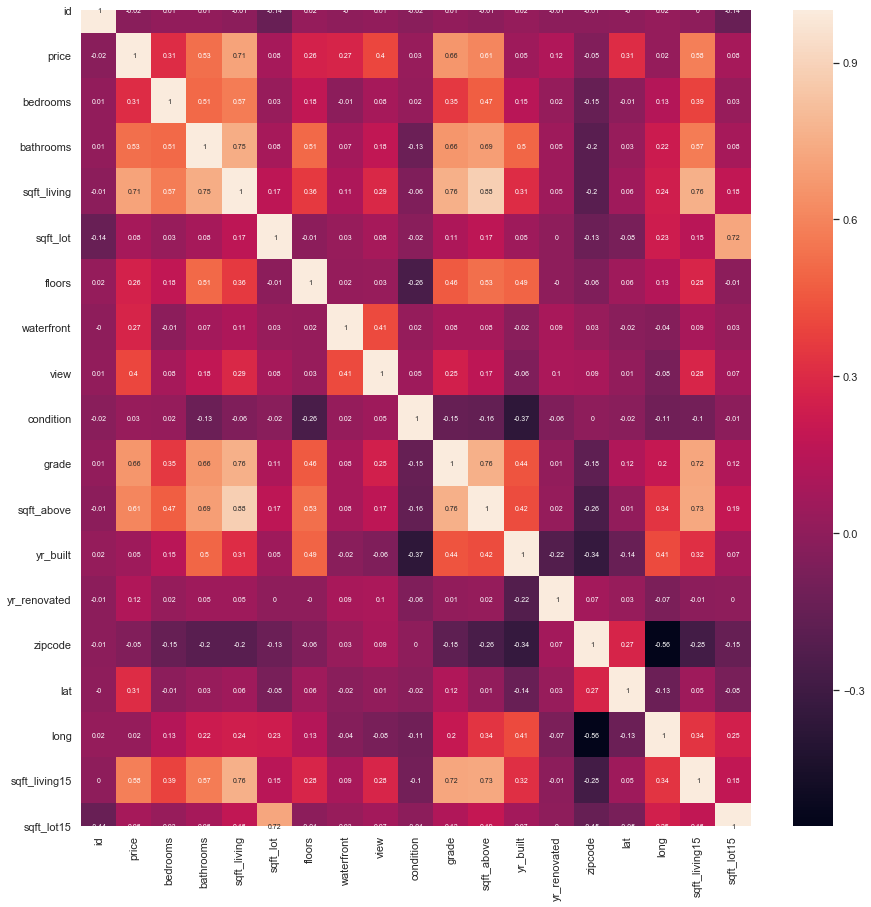

In [112]:
kc_heat_map = ds.corr().round(2)
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(data=kc_heat_map, annot=True, annot_kws={"size": 7})
plt.show()

## Combining Bedrooms + Bathrooms:

In [113]:
ds.loc[ds['bathrooms'] + ['bedrooms']]

AssertionError: <class 'list'>

In [ ]:
list_of_indexes = list(ds.columns)
print(list_of_indexes)
cols_to_compare_price = ["sqft_living15", "sqft_above", "grade", "sqft_living", "bathrooms"]
cols_to_drop = []
      
for item in list_of_indexes:
    if item != cols_to_compare_price:
        cols_to_drop.append(list_of_indexes[item])
   
    
    

cols_to_drop

In [ ]:
# df = sns.load_data('iris')

In [ ]:
ds.pivot(values = 'price', columns = 'id').tail()

In [ ]:
ds.loc[0:100]

In [114]:
ds.loc[20:26,['price','grade']] 


,price,grade
20,385000.0,7
21,2000000.0,9
22,285000.0,8
24,329000.0,8
25,233000.0,6


In [115]:
ds.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

how much does extra sqft cost in king county? <br>
whats the price of a waterfront view? <br>
are property views translating into property sales?

In [116]:
ds_no_front = ['id','date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', ['grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat,', 'long', 'sqft_living15', 'sqft_lot15']]

In [117]:
# ds.loc[[0,2], ds_no_front]

In [118]:
ds.loc[ds['grade']==5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,5/28/2014,550000.0,4,1.00,1660,34848,1.0,0.0,0.0,1,5,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467
166,2009000370,2/19/2015,269950.0,2,1.75,1340,7250,1.0,0.0,0.0,5,5,700,640.0,1949,0.0,98198,47.4080,-122.327,1830,9750
263,1400300055,4/28/2015,425000.0,2,1.00,770,5040,1.0,0.0,0.0,3,5,770,0.0,1930,0.0,98144,47.5964,-122.299,1330,2580
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
411,2422029094,7/16/2014,517534.0,2,1.00,833,143947,1.0,0.0,0.0,3,5,833,0.0,2006,0.0,98070,47.3889,-122.482,1380,143947
523,3340401555,11/5/2014,235000.0,4,1.50,1690,11054,1.0,0.0,0.0,4,5,1690,0.0,1930,0.0,98055,47.4667,-122.215,1690,9040
700,9349900105,4/7/2015,795000.0,2,1.00,1380,5000,1.5,0.0,2.0,3,5,1380,0.0,1905,0.0,98106,47.5708,-122.359,1500,5000
704,41000454,8/15/2014,130000.0,2,1.00,880,9000,1.0,0.0,0.0,3,5,880,0.0,1928,0.0,98188,47.4672,-122.291,1410,10000
820,3121059033,10/29/2014,325000.0,3,1.00,1490,57381,1.5,0.0,0.0,4,5,1490,0.0,1932,0.0,98092,47.2597,-122.228,1580,101529
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [119]:
ds_price_grade_sqft = ds[['price', '', 'grade', 'sqft_living15', 'bedrooms','floors', 'sqft_basement']]

KeyError: "[''] not in index"

In [120]:
ds_price_grade_sqft_df = pd.DataFrame(ds_price_grade_sqft)

ds_price_grade_sqft_df.head()

NameError: name 'ds_price_grade_sqft' is not defined

In [121]:
ds_price_grade_sqft.info()

NameError: name 'ds_price_grade_sqft' is not defined

In [122]:
kc_hm = ds_price_grade_sqft_df.corr().round(2)
sns.set(rc={'figure.figsize':(8, 8)})
sns.heatmap(data=kc_hm, annot=True, annot_kws={"size": 15})
plt.show()

NameError: name 'ds_price_grade_sqft_df' is not defined

.drop() to drop a specific value in a dataset specify with ['bedrooms'] == 33 <br> __(use a different variable on dropped data sets)__

In [123]:
ds.drop(ds.loc[ds['bedrooms']==33].index, inplace=True)

In [124]:
views_at_zero = len(ds.loc[ds['view'] == 0])
print(views_at_zero)

14240


In [125]:
views_recorded_above_zero = len(ds) - views_at_zero
print(views_recorded_above_zero)

1521


do the views come after renovation or not <br>
what are the views looking for in features <br>
why are those properties viewed vs the others? are there features around that area people want? <br>

### Zip_code & average grade:

In [126]:
zip_grade = ds[['price', 'grade']]
zip_grade_df = pd.DataFrame(zip_grade)
zip_grade_df.head(100)

,price,grade
1,538000.0,7
3,604000.0,7
4,510000.0,8
5,1230000.0,11
6,257500.0,7
8,229500.0,7
9,323000.0,7
11,468000.0,7
13,400000.0,7
14,530000.0,7


In [127]:
sns.set(style="whitegrid")
zip_grade_bar = sns.load_dataset(zip_grade_df)
ax = sns.barplot(x="price", y="grade", data=zip_grade_bar)

InvalidURL: URL can't contain control characters. '/mwaskom/seaborn-data/master/           price  grade\n1       538000.0      7\n3       604000.0      7\n4       510000.0      8\n5      1230000.0     11\n6       257500.0      7\n...          ...    ...\n21591   475000.0      8\n21592   360000.0      8\n21593   400000.0      8\n21594   402101.0      7\n21596   325000.0      7\n\n[15761 rows x 2 columns].csv' (found at least ' ')

In [128]:
#zip_grade.pivot(values = 'price', columns = 'grade').head(10)

In [129]:
zip_grade.loc[zip_grade['grade']<5]


,price,grade
1065,140000.0,4
3220,262000.0,3
3578,355000.0,4
5199,352000.0,4
7966,120000.0,4
8614,325000.0,4
9632,330000.0,4
11488,229050.0,4
11576,188000.0,4
12063,156000.0,4


In [130]:
zip_grade.loc[zip_grade['grade']== 13]

,price,grade
4807,2480000.0,13
5446,1780000.0,13
6035,2390000.0,13
7028,3800000.0,13
7245,7700000.0,13
7900,3200000.0,13
9245,6890000.0,13
10362,2980000.0,13
13398,2420000.0,13
13687,2340000.0,13


## Our first regression:

__question:__
1. space, floors, bathroom, bedroom, plot sizes, waterfront,. which features contribute best with price. run a regression

In [131]:
ds.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### space, floors, bathroom, bedroom, plot sizes

In [132]:
rooms_and_sizes = ds
rooms_and_sizes_df = pd.DataFrame(rooms_and_sizes)
rooms_and_sizes_df.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850


In [133]:
rooms_and_sizes_array = np.array(rooms_and_sizes_df)
rooms_and_sizes_array

array([[6414100192, '12/9/2014', 538000.0, ..., -122.319, 1690, 7639],
       [2487200875, '12/9/2014', 604000.0, ..., -122.39299999999999,
        1360, 5000],
       [1954400510, '2/18/2015', 510000.0, ..., -122.045, 1800, 7503],
       ...,
       [6600060120, '2/23/2015', 400000.0, ..., -122.36200000000001,
        1830, 7200],
       [1523300141, '6/23/2014', 402101.0, ..., -122.29899999999999,
        1020, 2007],
       [1523300157, '10/15/2014', 325000.0, ..., -122.29899999999999,
        1020, 1357]], dtype=object)

In [134]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [135]:
rooms_and_sizes_df['rooms']= rooms_and_sizes_df['bedrooms'] + rooms_and_sizes_df['bathrooms']






In [136]:
ds.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'rooms'],
      dtype='object')

In [137]:
x = rooms_and_sizes_df[['rooms', 'sqft_lot', 'waterfront', 'grade']]
y = rooms_and_sizes_df['price']
x_array = x.to_numpy()
y_array = y.to_numpy()
regression_features = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, copy_X =True)
regress = regression_features.fit(x, y)
# x_result = regress.coef_
# regress.summary()



# print('coef:{}'.format(round(x_result, 4)))

print('coef:{}'.format(x_result.round(1)))


# slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, y_array)






NameError: name 'x_result' is not defined

In [138]:
type(X)

pandas.core.frame.DataFrame

In [139]:
# Setting up the LEARNER
X = sm.add_constant(x)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.5
const        -1.035771e+06
rooms         3.503457e+04
sqft_lot      8.050000e-02
waterfront    9.540241e+05
grade         1.795420e+05
dtype: float64


/Users/nielsclausen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [140]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     3974.
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:01:04   Log-Likelihood:            -2.1904e+05
No. Observations:               15761   AIC:                         4.381e+05
Df Residuals:                   15756   BIC:                         4.381e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.036e+06   1.39e+04    -74.575      0.000   -1.06e+06   -1.01e+06
rooms       3.503e+04   1747.531     20.048      0.000    3.16e+04    3.85e+04
sqft_lot       0.0805      0.050      1.599      0.110      -0.018       0.179
waterfront   9.54e+05   2.42e+04     39.485      0.000    9.07e+05       1e+06
grade       1.795e+05   2197.950     81.686      0.000    1.75e+05    1.84e+05
==============================================================================
Omnibus:                    13954.817   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1489668.768
Skew:                           3.796   Prob(JB):                         0.00
Kurtosis:                      50.019   Cond. No.                     5.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [142]:
x.corr()

,rooms,sqft_lot,waterfront,grade
rooms,1.000000,0.058639,0.030790,0.575219
sqft_lot,0.058639,1.000000,0.025981,0.108943
waterfront,0.030790,0.025981,1.000000,0.083031
grade,0.575219,0.108943,0.083031,1.000000


In [143]:
x.describe()

,rooms,sqft_lot,waterfront,grade
count,15761.00000,1.576100e+04,15761.000000,15761.000000
mean,5.49789,1.528141e+04,0.007614,7.663790
std,1.46400,4.182414e+04,0.086927,1.172264
min,1.50000,5.200000e+02,0.000000,3.000000
25%,4.50000,5.048000e+03,0.000000,7.000000
50%,5.50000,7.603000e+03,0.000000,7.000000
75%,6.50000,1.072000e+04,0.000000,8.000000
max,16.50000,1.651359e+06,1.000000,13.000000


In [147]:
x1 = ds[['sqft_living']]
y1 = ds[['price']]
# Setting up the LEARNER
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.5
const         -55196.2846
sqft_living      286.1575
dtype: float64


What are the relative needs/drivers of price in expensive zipcodes vs cheaper zipcodes?

In [145]:
x1.sum()

sqft_living    44928711
dtype: int64

In [146]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:01:05   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""